<div style="padding:25px;color:white;margin:20;font-size:100%;text-align:center;display:fill;overflow:hidden;">
    <b>
        <span style='color:Black; font-size:45px;'>
        <u>SALES PREDICTION MODEL</u>
    </span>
    </b>
</div>


<div style="margin:10px" >
    <img src= "https://www.leadsquared.com/wp-content/uploads/2021/11/banner-4-3.png">
</div>

<div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:purple;font-weight:bold; font-size:40px;">About</span>
</div>

<div style="margin:1px;" >
    <p style="font-weight:bold; font-size:18px;">
The advertising dataset records the sales income produced in relation to the cost of advertisements across various media, including radio, television, and newspapers.It is necessary to comprehend how advertising budgets affect overall sales.
    </p>
</div>

 <div style="margin:40px;text-align:left;" >
    <span style="display:fill;overflow:hidden; color:purple;font-weight:bold; font-size:50px;"><u>Objective</u> : <span style="display:fill;overflow:hidden; color:Red;font-size:25px;">To build a machine learning (ML) predictive model that can, given the information available about the amount spent on advertising on various channels, forecast sales as precisely as is achievable.</span></span>
</div>
 
 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-1 : Importing Libraries</span>
</div>
 

In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-2 : Reading Dataset</span>
</div>

In [280]:
df=pd.read_csv('advertising.csv')

 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-3 : Exploratory Data Analysis(EDA)</span>
</div>

In [281]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [282]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [284]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [285]:
unique_rows_count = len(df.drop_duplicates())
print("No. of unique rows :",unique_rows_count)

No. of unique rows : 200


In [286]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


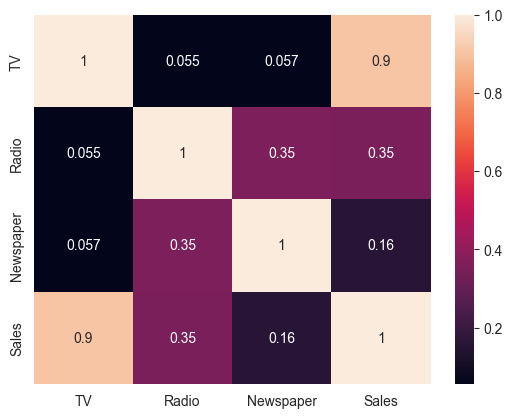

In [287]:
corr_matrix = df.corr()
hm = sns.heatmap(data=corr_matrix,annot=True)

<div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-4 : Data Visualization</span>
</div>

<Axes: xlabel='Sales'>

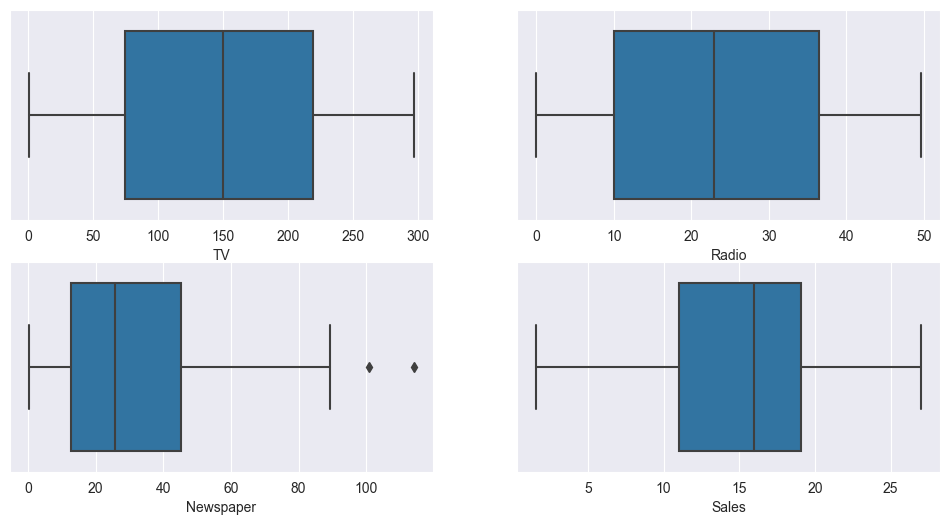

In [288]:
plt.figure(figsize =(12,6))
plt.subplot(2,2,1)
sns.boxplot(data=df, x='TV')
plt.subplot(2,2,2)
sns.boxplot(data=df, x='Radio')
plt.subplot(2,2,3)
sns.boxplot(data=df, x='Newspaper')
plt.subplot(2,2,4)
sns.boxplot(data=df, x='Sales')

<Axes: xlabel='Sales', ylabel='Density'>

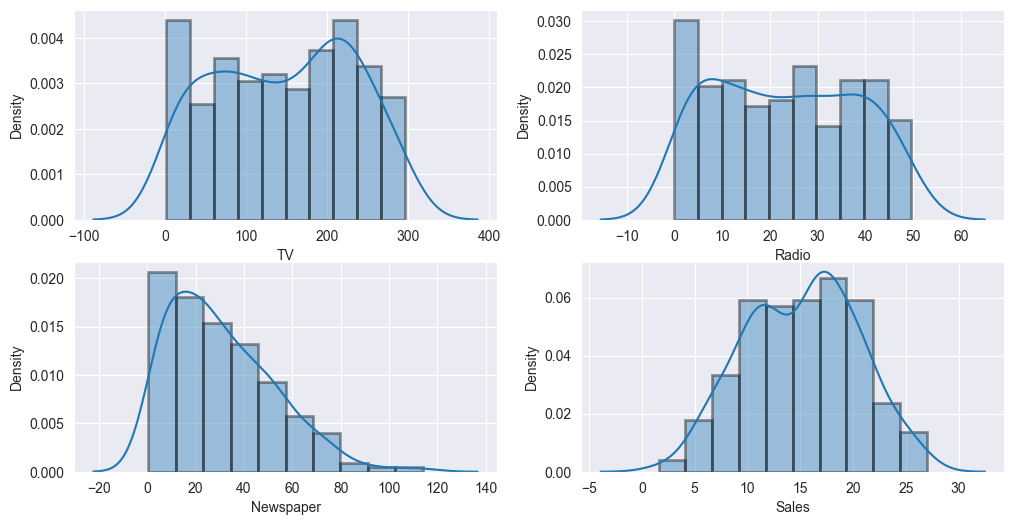

In [289]:
plt.figure(figsize =(12,6))
plt.subplot(2,2,1)
sns.distplot(df['TV'],hist_kws=dict(edgecolor="black", linewidth=2), bins=10)
plt.subplot(2,2,2)
sns.distplot(df['Radio'],hist_kws=dict(edgecolor="black", linewidth=2), bins=10)
plt.subplot(2,2,3)
sns.distplot(df['Newspaper'],hist_kws=dict(edgecolor="black", linewidth=2), bins=10)
plt.subplot(2,2,4)
sns.distplot(df['Sales'],hist_kws=dict(edgecolor="black", linewidth=2), bins=10)


Text(0.5, 1.0, 'Mean amount spent on each platform and sales achieved')

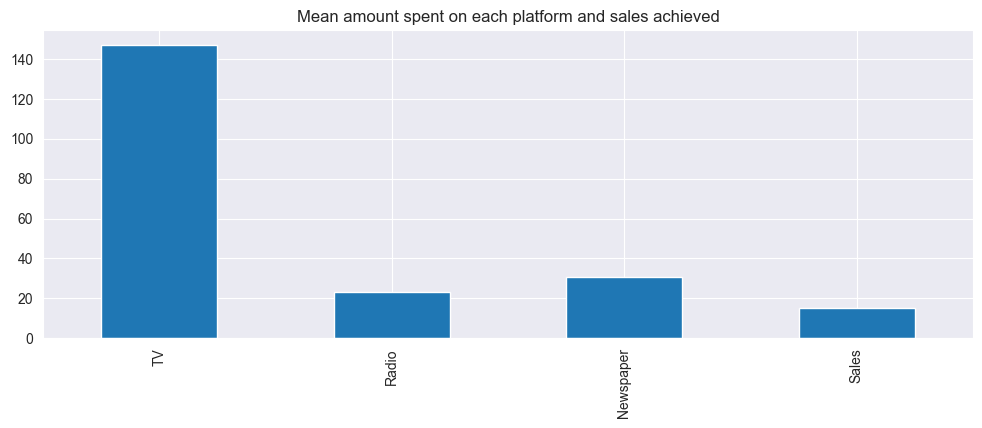

In [290]:
plt.figure(figsize =(12,4))
df.mean().plot(kind = 'bar')
plt.title('Mean amount spent on each platform and sales achieved')


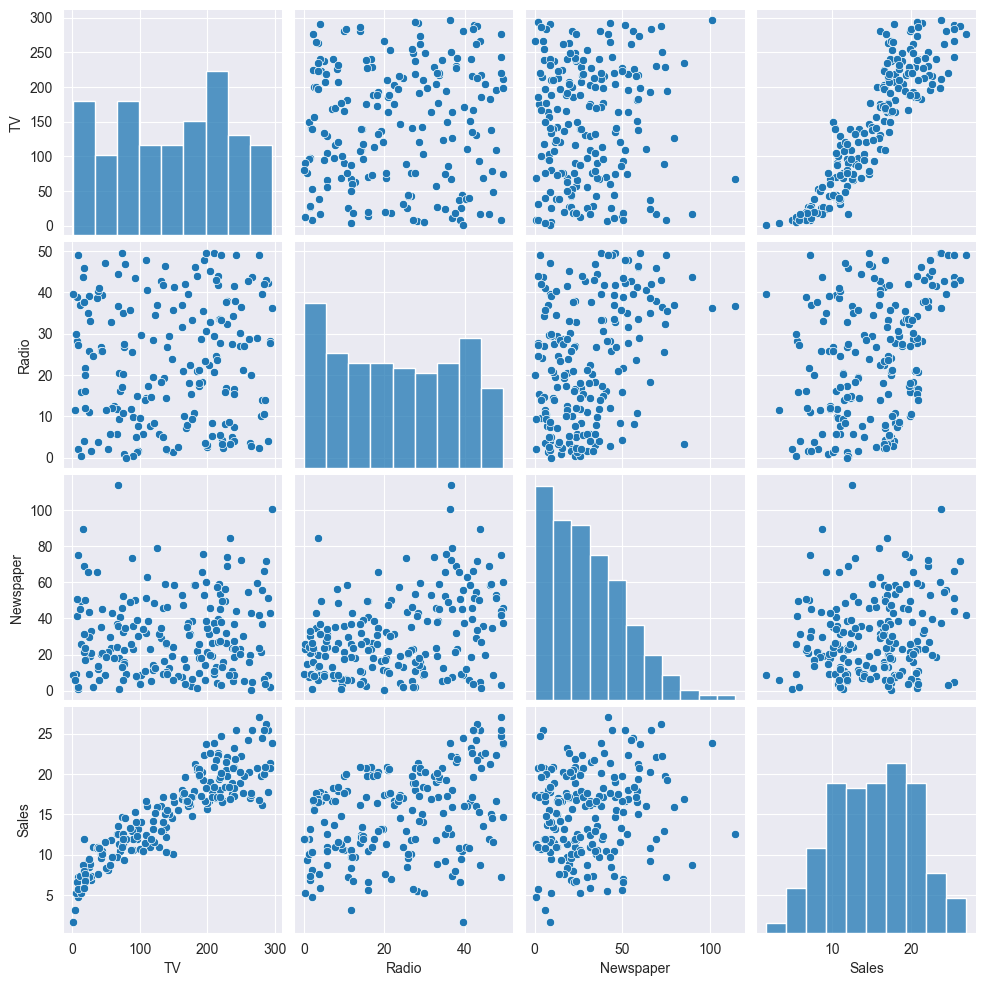

In [291]:
sns.set_style('darkgrid')
sns.pairplot(df)
plt.show()

Text(0.5, 1.0, 'The Regression Line Of Newspaper Vs Sales')

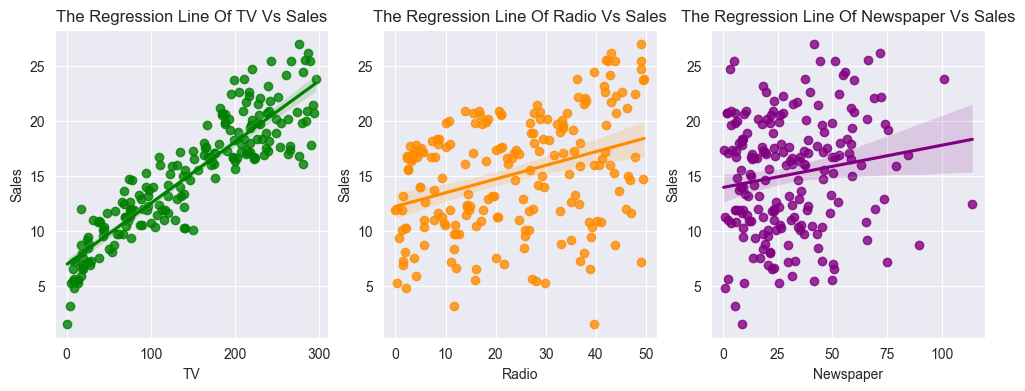

In [292]:
plt.figure(figsize =(12,4))
plt.subplot(1,3,1)
sns.regplot(data=df,x='TV',y='Sales',color='green').set_title('The Regression Line Of TV Vs Sales')
plt.subplot(1,3,2)
sns.regplot(data=df,x='Radio',y='Sales',color='darkorange').set_title('The Regression Line Of Radio Vs Sales')
plt.subplot(1,3,3)
sns.regplot(data=df,x='Newspaper',y='Sales',color='purple').set_title('The Regression Line Of Newspaper Vs Sales')

 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-5 : Splitting the data</span>
</div>

In [293]:
# Features selection
x=df[['TV','Radio','Newspaper']]
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [294]:
print("x_train : ", x_train.shape)
print("x_test : ", x_test.shape)
print("y_train : ", y_train.shape) 
print("y_test : ", y_test.shape) 

x_train :  (160, 3)
x_test :  (40, 3)
y_train :  (160,)
y_test :  (40,)


 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-6 : Model Building</span>
</div>

In [295]:
multi_regressor = LinearRegression()
multi_regressor.fit(x_train, y_train)
multi_y_pred = multi_regressor.predict(x_test)
from sklearn.metrics import r2_score
r2_multi_reg = r2_score(y_test, multi_y_pred)
print(round(r2_multi_reg*100, 2),'%')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, multi_y_pred)) 

90.46 %
Mean Absolute Error: 1.1051124490475204


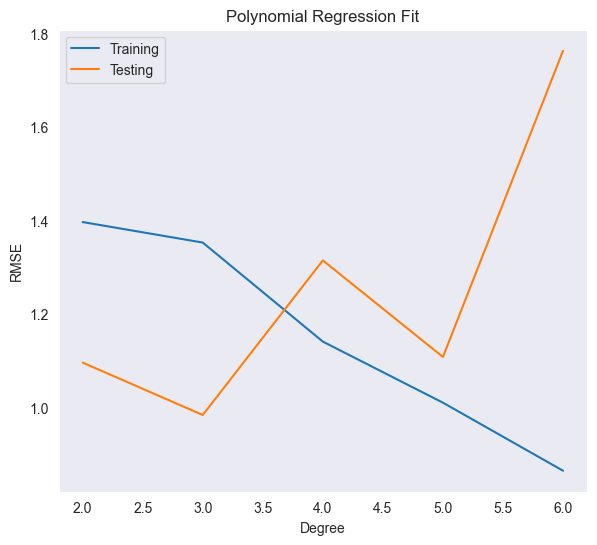

In [296]:
Trr=[]; Tss=[]
n_degree=7

for i in range(2,n_degree):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(x_train)
    X_poly1 = poly_reg.fit_transform(x_test)
    LR = LinearRegression()
    LR.fit(X_poly,y_train)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()

In [297]:
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(x_train)
poly_regressor = LinearRegression()
poly_regressor.fit(x_poly, y_train)

x_test_poly = poly_reg.transform(x_test)
poly_y_pred = poly_regressor.predict(x_test_poly)

r2_poly_reg = r2_score(y_test, poly_y_pred)
print(round(r2_poly_reg*100, 2), '%')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, poly_y_pred))

95.43 %
Mean Absolute Error: 0.7256492013377294


In [298]:
import statsmodels.api as sm
regressor= LinearRegression()
regressor.fit(x_train,y_train)
regressor_predict = regressor.predict(x_test)
x_train_sm = sm.add_constant(x_train)
regressor= sm.OLS(y_train,x_train_sm)
regressionline=regressor.fit()
regressionline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     464.3
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           1.65e-77
Time:                        22:11:58   Log-Likelihood:                -311.79
No. Observations:                 160   AIC:                             631.6
Df Residuals:                     156   BIC:                             643.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5765      0.344     13.291      0.000       3.896       5.257
TV             0.0549      0.002     34.803      0.000       0.052       0.058
Radio          0.1033      0.010     10.408      0.000       0.084       0.123
Newspaper      0.0012      0.007      0.175      0.861      -0.012       0.014
==============================================================================
Omnibus:                       11.911   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               18.953
Skew:                          -0.385   Prob(JB):                     7.66e-05
Kurtosis:                       4.500   Cond. No.                         429.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
regressionline.params

const        4.576497
TV           0.054924
Radio        0.103308
Newspaper    0.001153
dtype: float64

In [300]:
print("Sales =",regressionline.params[0],"+","TV*",regressionline.params[1],"+","Radio*",regressionline.params[2],"+","Newspaper*",regressionline.params[3])

Sales = 4.576497149660376 + TV* 0.05492413570070164 + Radio* 0.10330838677912582 + Newspaper* 0.0011530143915791154


<span style="display:fill;overflow:hidden; color:darkViolet;font-size:30px;font-weight:bold;">MODEL ACCURACY ACHIEVED: <span style="color:purple;font-size:30px;font-weight:bold">95.4 %</span></span>

 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-7 : Making Prediction using model</span>
</div>

In [301]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [302]:
TV_in = float(232)
Radio_in =  float(8)
Newspaper_in =  float(8)
pred_Sales = regressionline.params[0] + (TV_in*regressionline.params[1]) + (Radio_in*regressionline.params[2]) + (Newspaper_in*regressionline.params[3])
print("Predicted Sales :", pred_Sales)

Predicted Sales : 18.154587841588796


<div style="padding:15px;color:white;font-size:100%;text-align:center;display:fill;overflow:hidden;">
   <b> <span style='color:red; font-size:30px;'>Made by Sagar Thora</span></b>
</div>